In [35]:
from engine import Value, draw_graph
import random

class Neuron:
    def __init__(self, nin=1):
        self.weights = [Value(data=random.uniform(-1,1), label='weight') for _ in range(nin)]
        self.bias = Value(data=random.uniform(-1,1), label='bias')

    def __call__(self, vals):
        act = sum((weight*val for weight, val in zip(self.weights, vals)), self.bias)
        out = act.tan()
        return out

    def parameters(self):
        return self.weights + [self.bias]

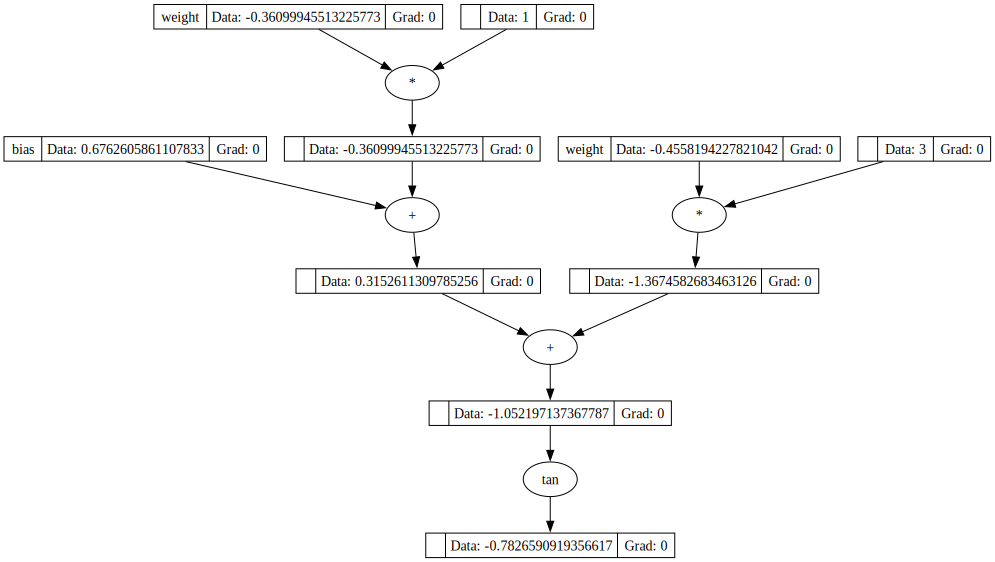

In [36]:
# Initialize neuron with 2 inputs and 1 output
n = Neuron(2)
# feed neuron some data
input = [1,3]
output = n(input)
# draw how neuron would look like
draw_graph(output)

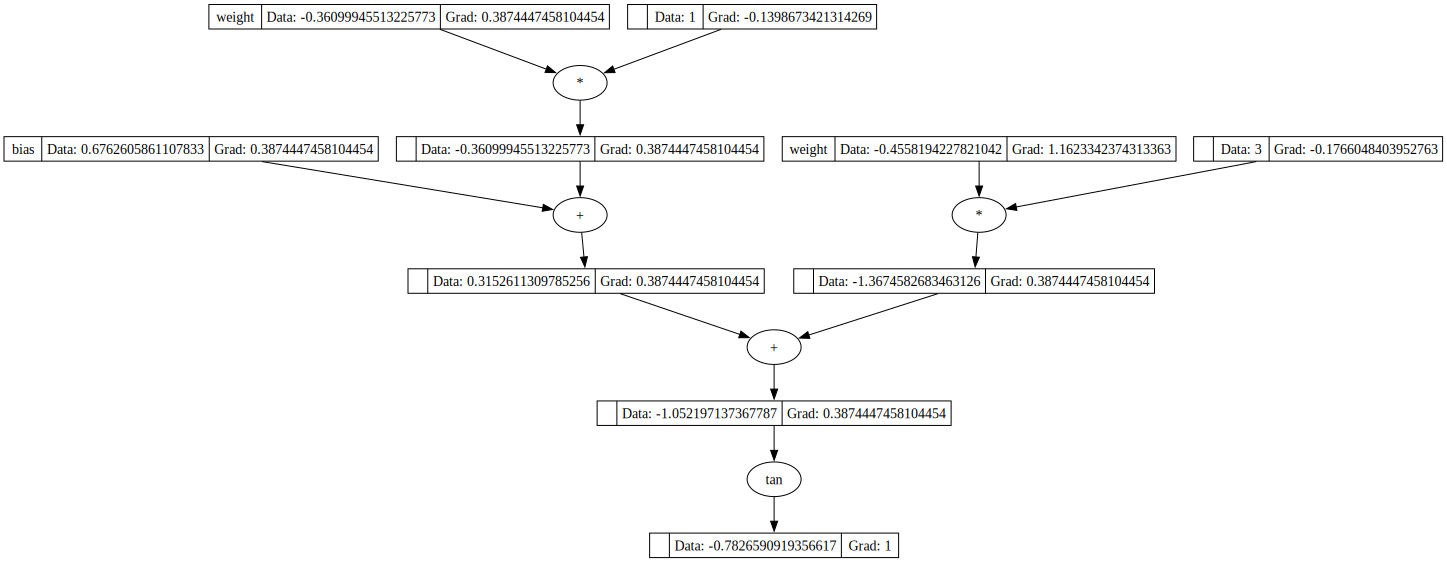

In [37]:
# backpropogate the neuron to calculate gradient decent of weights and bias
output.backward()
# draw the neuron
draw_graph(output)

In [38]:
n.parameters()

[Value(-0.36099945513225773, weight),
 Value(-0.4558194227821042, weight),
 Value(0.6762605861107833, bias)]

In [39]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, nin):
        outs = [neuron(nin) for neuron in self.neurons]
        return outs[0] if len(outs)==1 else outs